# Homework 3 (Convolutional Neural Networks)

## Playing Card Classification Dataset

Prompt: Build your own Deep CONVOLUTIONAL Neural Network (No Recurrent Layers, no Transfer Learning or use of existing models unless approved by Dr. P ahead of time, no Generative Models) using keras/tensorflow (at least 5 Convolutional Layers, and at least 3 Pooling Layers) to do one of the following tasks:

- Classify Images (e.g. Hot Dog vs. Not a Hot Dog)
- Compress Images (e.g. with a Convolutional AutoEncoder)
- Detect/Segment Objects (e.g. what pixels in the image contain a cat?)

Make sure that:

- your NN has some sort of regularization (or multiple types if needed)
- you've properly formatted and inputted your data into the network
- your model architechture and loss function are appropriate for the problem
- you print out at least 2 metrics for both train and test data to examine
- you plot the history of your model

In [22]:
!pip install split-folders


In [23]:
# imports
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from keras.datasets import mnist, fashion_mnist
import tensorflow.keras as kb
from tensorflow.keras import backend
from tensorflow.keras.metrics import MeanSquaredError

import tensorflow as tf
import splitfolders
import matplotlib.pyplot as plt

In [24]:
from google.colab import files
uploaded = files.upload()

Saving archive (3).zip to archive (3).zip


In [25]:
!unzip RiceDataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (55).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (550).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5500).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5501).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5502).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5503).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5504).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5505).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5506).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5507).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5508).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5509).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (551).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5510).jpg  
  inflating: Rice_Image_Dataset/Karacadag/K

In [27]:
# splitting data into Train, Test and Validation
splitfolders.ratio(input="Rice_Image_Dataset", output='rice_images', seed=42, ratio=(0.7, 0.15, 0.15))

Copying files: 75000 files [00:08, 8409.39 files/s]


In [29]:
# Paths to train, test, and validation directories
train_dir = "rice_images/train"
test_dir = "rice_images/test"
val_dir = "rice_images/valid"

# Define parameters
batch_size = 32
image_size = (250, 250)

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    seed=123,
    image_size=image_size,
    batch_size=batch_size
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    seed=123,
    image_size=image_size,
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    seed=123,
    image_size=image_size,
    batch_size=batch_size
)


Found 52500 files belonging to 5 classes.
Found 11250 files belonging to 5 classes.
Found 11250 files belonging to 5 classes.


In [32]:
# Classifying Rice Images

# Setting image dimensions
image_width = 250
image_height = 250

# Building the model
model = kb.Sequential()

model.add(kb.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_width, image_height, 3)))
model.add(kb.layers.MaxPooling2D((2, 2)))

model.add(kb.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(kb.layers.MaxPooling2D((2, 2)))

model.add(kb.layers.Conv2D(128, (3, 3), activation='relu'))

model.add(kb.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(kb.layers.MaxPooling2D((2, 2)))

model.add(kb.layers.Conv2D(256, (3, 3), activation='relu'))

model.add(kb.layers.Flatten())

# Using dropout for regularization
model.add(kb.layers.Dropout(0.5))
model.add(kb.layers.Dense(512, activation='relu'))

# Output layer
# use softmax activation and 5 neuron since there are 5 types of rice
model.add(kb.layers.Dense(5, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', 'sparse_categorical_crossentropy'])


In [38]:
# Train the model
history = model.fit(
    train_ds,
    epochs=7,
    validation_data=val_ds
)


Epoch 1/7
1641/1641 [==============================] - 70s 43ms/step - loss: 0.0529 - accuracy: 0.9824 - sparse_categorical_crossentropy: 0.0529 - val_loss: 0.0633 - val_accuracy: 0.9810 - val_sparse_categorical_crossentropy: 0.0633
Epoch 2/7
1641/1641 [==============================] - 70s 43ms/step - loss: 0.0474 - accuracy: 0.9844 - sparse_categorical_crossentropy: 0.0474 - val_loss: 0.2715 - val_accuracy: 0.9402 - val_sparse_categorical_crossentropy: 0.2715
Epoch 3/7
1641/1641 [==============================] - 70s 43ms/step - loss: 0.0432 - accuracy: 0.9860 - sparse_categorical_crossentropy: 0.0432 - val_loss: 0.0827 - val_accuracy: 0.9822 - val_sparse_categorical_crossentropy: 0.0827
Epoch 4/7
1641/1641 [==============================] - 70s 43ms/step - loss: 0.0342 - accuracy: 0.9881 - sparse_categorical_crossentropy: 0.0342 - val_loss: 0.0661 - val_accuracy: 0.9838 - val_sparse_categorical_crossentropy: 0.0661
Epoch 5/7
1641/1641 [==============================] - 70s 43ms/step

In [39]:
test_loss, test_accuracy, test_crossentropy = model.evaluate(test_ds)

352/352 [==============================] - 6s 18ms/step - loss: 0.0657 - accuracy: 0.9839 - sparse_categorical_crossentropy: 0.0657


In [43]:
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")
print(f"Test crossentropy: {test_crossentropy}")


Test loss: 0.06572101265192032
Test accuracy: 0.9839110970497131
Test crossentropy: 0.06572101265192032


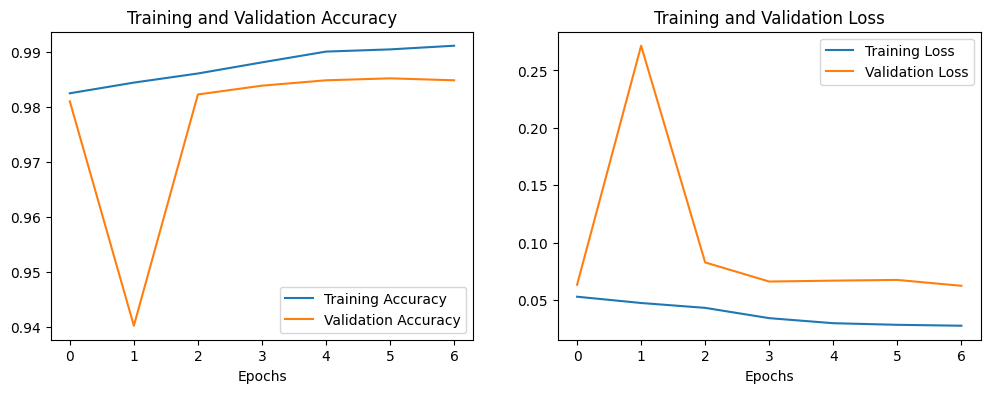

In [42]:
# Plotting training & validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')

plt.show()

